- Title: Extract Images from Video Using OpenCV in Python
- Slug: python-opencv-video-to-image
- Date: 2020-03-25 17:33:14
- Category: Computer Science
- Tags: programming, Python, OpenCV, computer vision, CV, video, image
- Author: Ben Du
- Modified: 2021-08-15 11:43:03


## Tips and Traps

1. Most videoes have a FPS of 24. 
    Some videos have higher FPS (e.g., 30 or 60) so that they can capture motions better. 
    A record video on a computer has a FPS of the refresh rate of the monitor, 
    which is usually 60.
    You can get the FPS of a video using OpenCV in Python. 

## Installation 

Install OpenCV for Python following instructions at http://www.legendu.net/misc/blog/tips-on-opencv/#installation.

In [10]:
import numpy as np
from PIL import Image
import cv2

Download [the big buck bunny video](https://www.sample-videos.com/video123/mp4/720/big_buck_bunny_720p_5mb.mp4).

In [1]:
!wget --no-check-certificate https://www.sample-videos.com/video123/mp4/720/big_buck_bunny_720p_5mb.mp4 -O bunny.mp4

--2022-05-21 17:15:54--  https://www.sample-videos.com/video123/mp4/720/big_buck_bunny_720p_5mb.mp4
Resolving www.sample-videos.com (www.sample-videos.com)... 103.145.51.95
Connecting to www.sample-videos.com (www.sample-videos.com)|103.145.51.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5253880 (5.0M) [video/mp4]
Saving to: ‘bunny.mp4’

bunny.mp4           100%[===================>]   5.01M  2.11MB/s    in 2.4s    

2022-05-21 17:15:58 (2.11 MB/s) - ‘bunny.mp4’ saved [5253880/5253880]



In [2]:
import cv2

vidcap = cv2.VideoCapture("bunny.mp4")
vidcap.get(cv2.CAP_PROP_FPS)

25.0

You can get total number of frames in a video using the following Python code.

In [4]:
vidcap.get(cv2.CAP_PROP_FRAME_COUNT)

739.0

`cv2.VideoCapture.read` returns a tuple of `(bool, numpy.ndarray)`.
The returned numpy array is the `BGR` representation of the frame/image.

In [5]:
success, arr = vidcap.read()

The first value of the returned tuple is a flag indicating whether the read success.

In [6]:
success

True

The second value of the returned tuple is a nump array with the dimension `(image_height, image_width, 3)`.

In [7]:
arr

array([[[ 46, 112, 104],
        [ 31,  97,  89],
        [ 21,  92,  83],
        ...,
        [251, 223, 205],
        [251, 223, 205],
        [251, 223, 205]],

       [[ 44, 110, 102],
        [ 30,  96,  88],
        [ 22,  93,  84],
        ...,
        [251, 223, 205],
        [251, 223, 205],
        [251, 223, 205]],

       [[ 38, 104,  96],
        [ 26,  92,  84],
        [ 26,  97,  88],
        ...,
        [251, 223, 205],
        [251, 223, 205],
        [251, 223, 205]],

       ...,

       [[ 43, 131, 138],
        [ 57, 145, 152],
        [ 70, 153, 161],
        ...,
        [ 24, 117, 109],
        [ 27, 135, 116],
        [ 46, 154, 135]],

       [[ 54, 145, 151],
        [ 67, 158, 164],
        [ 72, 160, 167],
        ...,
        [ 27, 115, 108],
        [ 25, 128, 110],
        [ 46, 149, 131]],

       [[ 62, 153, 159],
        [ 68, 159, 165],
        [ 70, 158, 165],
        ...,
        [ 33, 121, 114],
        [ 28, 131, 113],
        [ 42, 145, 127]]

The numpy array is the `BGR` (instead of `RGB`) representation of the image,
which means that you have to flip the last dimension of the numpy array
so that it can loaded using the Pillow library correctly.

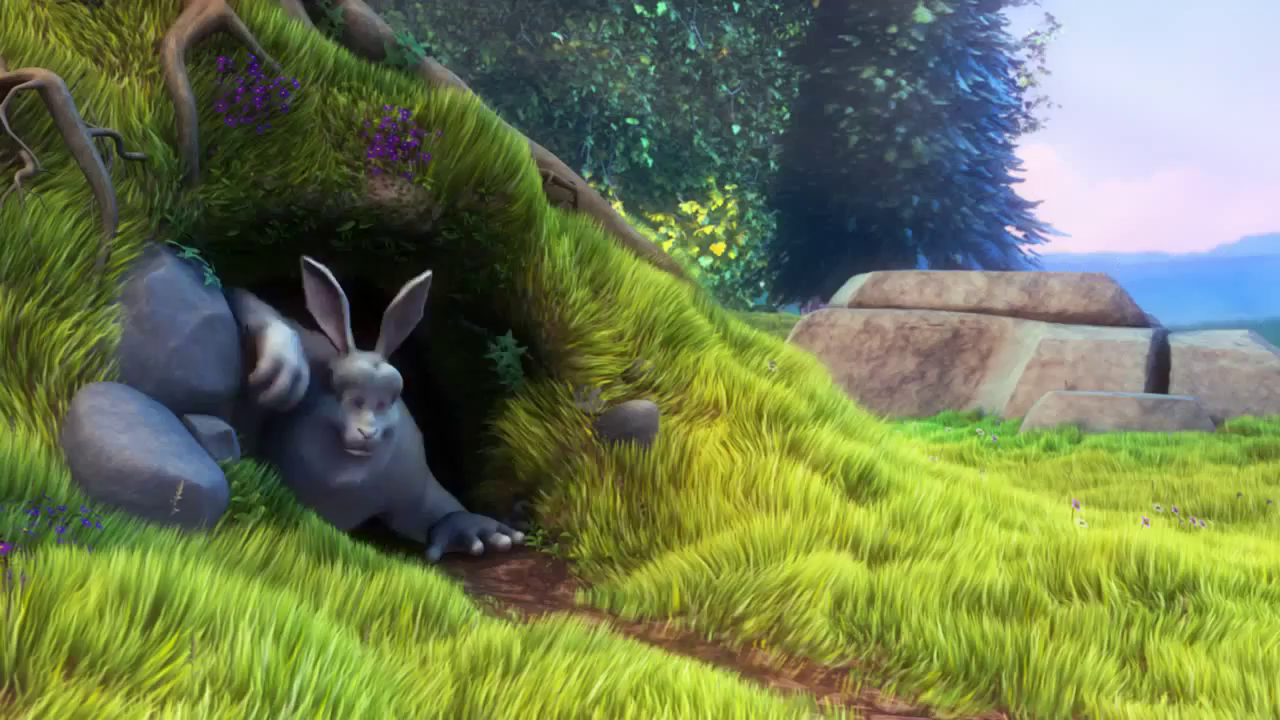

In [16]:
Image.fromarray(np.flip(arr, 2))

Extract PNG images from the downloaded video every 5 frames.

In [17]:
import cv2

vidcap = cv2.VideoCapture("bunny.mp4")
count = 0
while True:
    success, image = vidcap.read()
    if not success:
        break
    if count % 5 == 0:
        cv2.imwrite(f"frame_{'{:0>3}'.format(count)}.png", image)
    count += 1

## Use Pillow to Handle FLI

If you are dealing with a FLI animation file,
you can also use the Python package Pillow to extract frames from it.
For more details,
please refer to 
[ImageSequence Module](https://pillow.readthedocs.io/en/latest/reference/ImageSequence.html).

In [ ]:
from PIL import Image, ImageSequence

im = Image.open("animation.fli")

index = 0
for frame in ImageSequence.Iterator(im):
    frame.save("frame%d.png" % index)
    index += 1

## References

- [Manipulate Videos Using MoviePy in Python](https://www.legendu.net/en/blog/python-moviepy/)

- [Tips on OpenCV](http://www.legendu.net/misc/blog/tips-on-opencv)

- [Python - Extracting and Saving Video Frames](https://stackoverflow.com/questions/33311153/python-extracting-and-saving-video-frames)

- [Big Buck Bunny @ archive.org](https://archive.org/download/BigBuckBunny_328/BigBuckBunny_512kb.mp4)